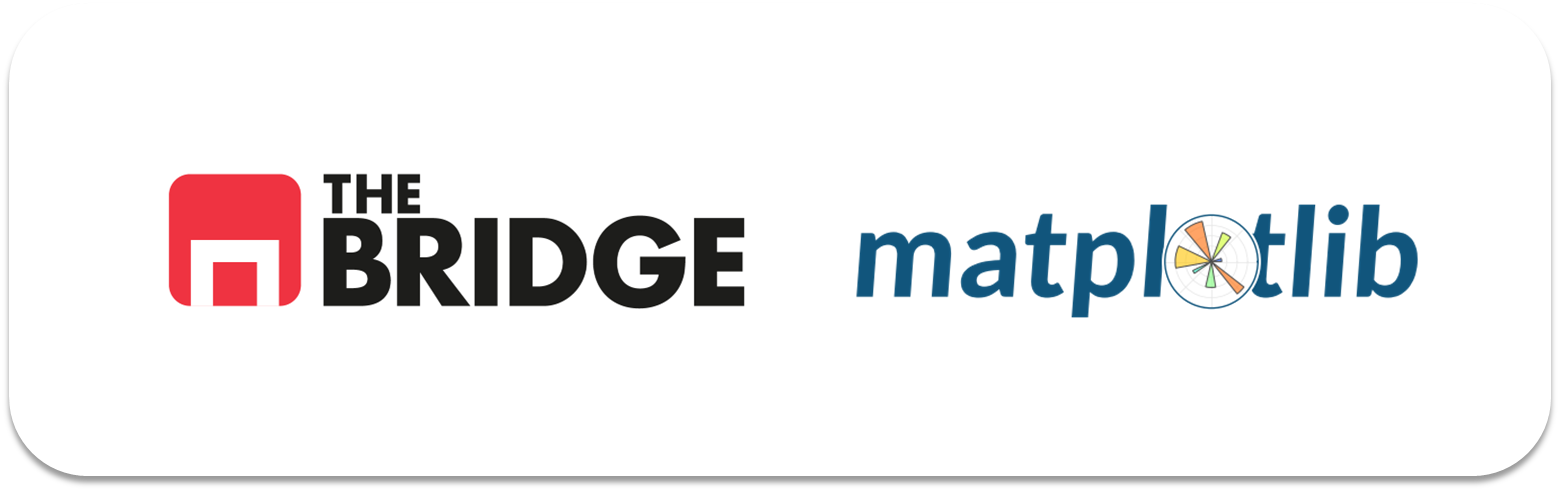

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [42]:
df = pd.read_csv("./data/california_cities.csv")
df

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [44]:
# Cálculo del porcentaje de valores nulos por columna
porcentaje_nulos = round(df.isnull().mean() * 100, 2)  # pd.Series con porcentaje de nulos

# Mostrar como DataFrame (opcional)
porcentaje_nulos_df = porcentaje_nulos.reset_index()
porcentaje_nulos_df.columns = ['Columna', 'Porcentaje_Nulos']

porcentaje_nulos_df

,Columna,Porcentaje_Nulos
0,Unnamed: 0,0.00
1,city,0.00
2,latd,0.00
3,longd,0.00
4,elevation_m,9.96
5,elevation_ft,2.49
6,population_total,0.00
7,area_total_sq_mi,0.41
8,area_land_sq_mi,0.00
9,area_water_sq_mi,0.21


### Como elevation_m y elevation_ft parece que es el mismo dato, pero uno en metros y otro en pies, vamos a utilizar los valores no nulos de ambas columnas para intentar rellenar los datos de la otra (en los casos en los que no son nulos ambos valores)

In [45]:
# Calcular el cociente a partir de filas donde ambas columnas no sean nulas
non_null_rows = df.dropna(subset=['elevation_m', 'elevation_ft'])
if not non_null_rows.empty:
    random_row = non_null_rows.sample(1)  # Selecciona una fila aleatoria
    ratio = (random_row['elevation_ft'] / random_row['elevation_m']).values[0] # Este ratio siempre debe ser el mismo para todos los valores
else:
    raise ValueError("No hay suficientes datos para calcular el cociente.")

# Rellenar valores nulos en elevation_m usando elevation_ft
df['elevation_m'] = df['elevation_m'].fillna(df['elevation_ft'] / ratio)

# Rellenar valores nulos en elevation_ft usando elevation_m
df['elevation_ft'] = df['elevation_ft'].fillna(df['elevation_m'] * ratio)

# Chequeamos como ha quedado
# Cálculo del porcentaje de valores nulos por columna
porcentaje_nulos = round(df.isnull().mean() * 100, 2)  # pd.Series con porcentaje de nulos

# Mostrar como DataFrame (opcional)
porcentaje_nulos_df = porcentaje_nulos.reset_index()
porcentaje_nulos_df.columns = ['Columna', 'Porcentaje_Nulos']

porcentaje_nulos_df

,Columna,Porcentaje_Nulos
0,Unnamed: 0,0.00
1,city,0.00
2,latd,0.00
3,longd,0.00
4,elevation_m,1.66
5,elevation_ft,1.66
6,population_total,0.00
7,area_total_sq_mi,0.41
8,area_land_sq_mi,0.00
9,area_water_sq_mi,0.21


### Comprobamos que area total es igual a la suma de area de tierra y area de agua. Podemos utilizar esto para intentar rellenar nulos del mismo modo que anteriormente

In [46]:
# Rellenar valores nulos para area_total_sq_mi
df['area_total_sq_mi'] = df['area_total_sq_mi'].fillna(
    df['area_land_sq_mi'] + df['area_water_sq_mi']
)

# Rellenar valores nulos para area_land_sq_mi
df['area_land_sq_mi'] = df['area_land_sq_mi'].fillna(
    df['area_total_sq_mi'] - df['area_water_sq_mi']
)

# Rellenar valores nulos para area_water_sq_mi
df['area_water_sq_mi'] = df['area_water_sq_mi'].fillna(
    df['area_total_sq_mi'] - df['area_land_sq_mi']
)

# Chequeamos como ha quedado
# Cálculo del porcentaje de valores nulos por columna
porcentaje_nulos = round(df.isnull().mean() * 100, 2)  # pd.Series con porcentaje de nulos

# Mostrar como DataFrame (opcional)
porcentaje_nulos_df = porcentaje_nulos.reset_index()
porcentaje_nulos_df.columns = ['Columna', 'Porcentaje_Nulos']

porcentaje_nulos_df

,Columna,Porcentaje_Nulos
0,Unnamed: 0,0.00
1,city,0.00
2,latd,0.00
3,longd,0.00
4,elevation_m,1.66
5,elevation_ft,1.66
6,population_total,0.00
7,area_total_sq_mi,0.00
8,area_land_sq_mi,0.00
9,area_water_sq_mi,0.00


### Como no han quedado valores nulos, y el ratio entre area_total_sq_mi y area_total_km2 es el mismo siempre, utilizamos esto para rellenar nulos de las columnas acabadas en km2

In [47]:
# Calcular el cociente a partir de filas donde ambas columnas no sean nulas
non_null_rows = df.dropna(subset=['area_total_sq_mi', 'area_total_km2'])
if not non_null_rows.empty:
    random_row = non_null_rows.sample(1)  # Selecciona una fila aleatoria
    ratio = (random_row['area_total_sq_mi'] / random_row['area_total_km2']).values[0] # Este ratio siempre debe ser el mismo para todos los valores
else:
    raise ValueError("No hay suficientes datos para calcular el cociente.")

# Rellenar valores nulos para area_total_km2
df['area_total_km2'] = df['area_total_km2'].fillna(
    df['area_total_sq_mi'] / ratio
)

# Rellenar valores nulos para area_land_km2
df['area_land_km2'] = df['area_land_km2'].fillna(
    df['area_land_sq_mi'] / ratio
)

# Rellenar valores nulos para area_water_km2
df['area_water_km2'] = df['area_water_km2'].fillna(
    df['area_water_sq_mi'] / ratio
)

# Chequeamos como ha quedado
# Cálculo del porcentaje de valores nulos por columna
porcentaje_nulos = round(df.isnull().mean() * 100, 2)  # pd.Series con porcentaje de nulos

# Mostrar como DataFrame (opcional)
porcentaje_nulos_df = porcentaje_nulos.reset_index()
porcentaje_nulos_df.columns = ['Columna', 'Porcentaje_Nulos']

porcentaje_nulos_df

,Columna,Porcentaje_Nulos
0,Unnamed: 0,0.00
1,city,0.00
2,latd,0.00
3,longd,0.00
4,elevation_m,1.66
5,elevation_ft,1.66
6,population_total,0.00
7,area_total_sq_mi,0.00
8,area_land_sq_mi,0.00
9,area_water_sq_mi,0.00


### Rellenamos nulos de area de agua como un cociente entre area water y area total

In [48]:
df['area_water_percent'] = df['area_water_percent'].fillna(round(df['area_water_km2'] / df['area_total_km2'] * 100, 2))

# Chequeamos como ha quedado
# Cálculo del porcentaje de valores nulos por columna
porcentaje_nulos = round(df.isnull().mean() * 100, 2)  # pd.Series con porcentaje de nulos

# Mostrar como DataFrame (opcional)
porcentaje_nulos_df = porcentaje_nulos.reset_index()
porcentaje_nulos_df.columns = ['Columna', 'Porcentaje_Nulos']

porcentaje_nulos_df

,Columna,Porcentaje_Nulos
0,Unnamed: 0,0.00
1,city,0.00
2,latd,0.00
3,longd,0.00
4,elevation_m,1.66
5,elevation_ft,1.66
6,population_total,0.00
7,area_total_sq_mi,0.00
8,area_land_sq_mi,0.00
9,area_water_sq_mi,0.00


### Reemplazamos los valores nulos restantes de elevación por las modas

In [49]:
# Calcular la moda para cada columna
mode_elevation_m = df['elevation_m'].mode().iloc[0]  # Selecciona la primera moda
mode_elevation_ft = df['elevation_ft'].mode().iloc[0]

# Reemplazar los valores nulos con la moda
df['elevation_m'] = df['elevation_m'].fillna(mode_elevation_m)
df['elevation_ft'] = df['elevation_ft'].fillna(mode_elevation_ft)

# Chequeamos como ha quedado
# Cálculo del porcentaje de valores nulos por columna
porcentaje_nulos = round(df.isnull().mean() * 100, 2)  # pd.Series con porcentaje de nulos

# Mostrar como DataFrame (opcional)
porcentaje_nulos_df = porcentaje_nulos.reset_index()
porcentaje_nulos_df.columns = ['Columna', 'Porcentaje_Nulos']

porcentaje_nulos_df

,Columna,Porcentaje_Nulos
0,Unnamed: 0,0.0
1,city,0.0
2,latd,0.0
3,longd,0.0
4,elevation_m,0.0
5,elevation_ft,0.0
6,population_total,0.0
7,area_total_sq_mi,0.0
8,area_land_sq_mi,0.0
9,area_water_sq_mi,0.0


## ¡NULOS ELIMINADOS!

In [12]:
df.describe()

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,240.500000,36.095088,-119.837714,170.536076,555.207573,6.489493e+04,18.421481,16.840981,1.586539,47.707450,43.619602,4.093314,5.250807
std,139.285678,2.298006,2.147676,301.798770,992.097318,2.032041e+05,36.296395,32.694647,9.480759,93.985546,84.668506,24.551506,14.588679
min,0.000000,32.578333,-124.263333,-55.384615,-180.000000,1.000000e+00,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,120.250000,33.977292,-121.954931,20.000000,62.000000,1.090200e+04,3.694750,3.506500,0.000000,9.568750,9.081250,0.000000,0.000000
50%,240.500000,36.204722,-119.708611,59.500000,188.500000,2.905750e+04,9.093000,8.362000,0.029500,23.550000,21.657000,0.076500,0.330000
75%,360.750000,37.886667,-117.977292,157.000000,510.250000,6.646650e+04,19.952750,19.090000,0.239250,51.676000,49.442402,0.623250,1.870000
max,481.000000,41.965000,-114.596389,2402.000000,7880.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,479.139570,84.580000


In [13]:
df.to_csv('dataframe_without_null.csv', index=False)

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

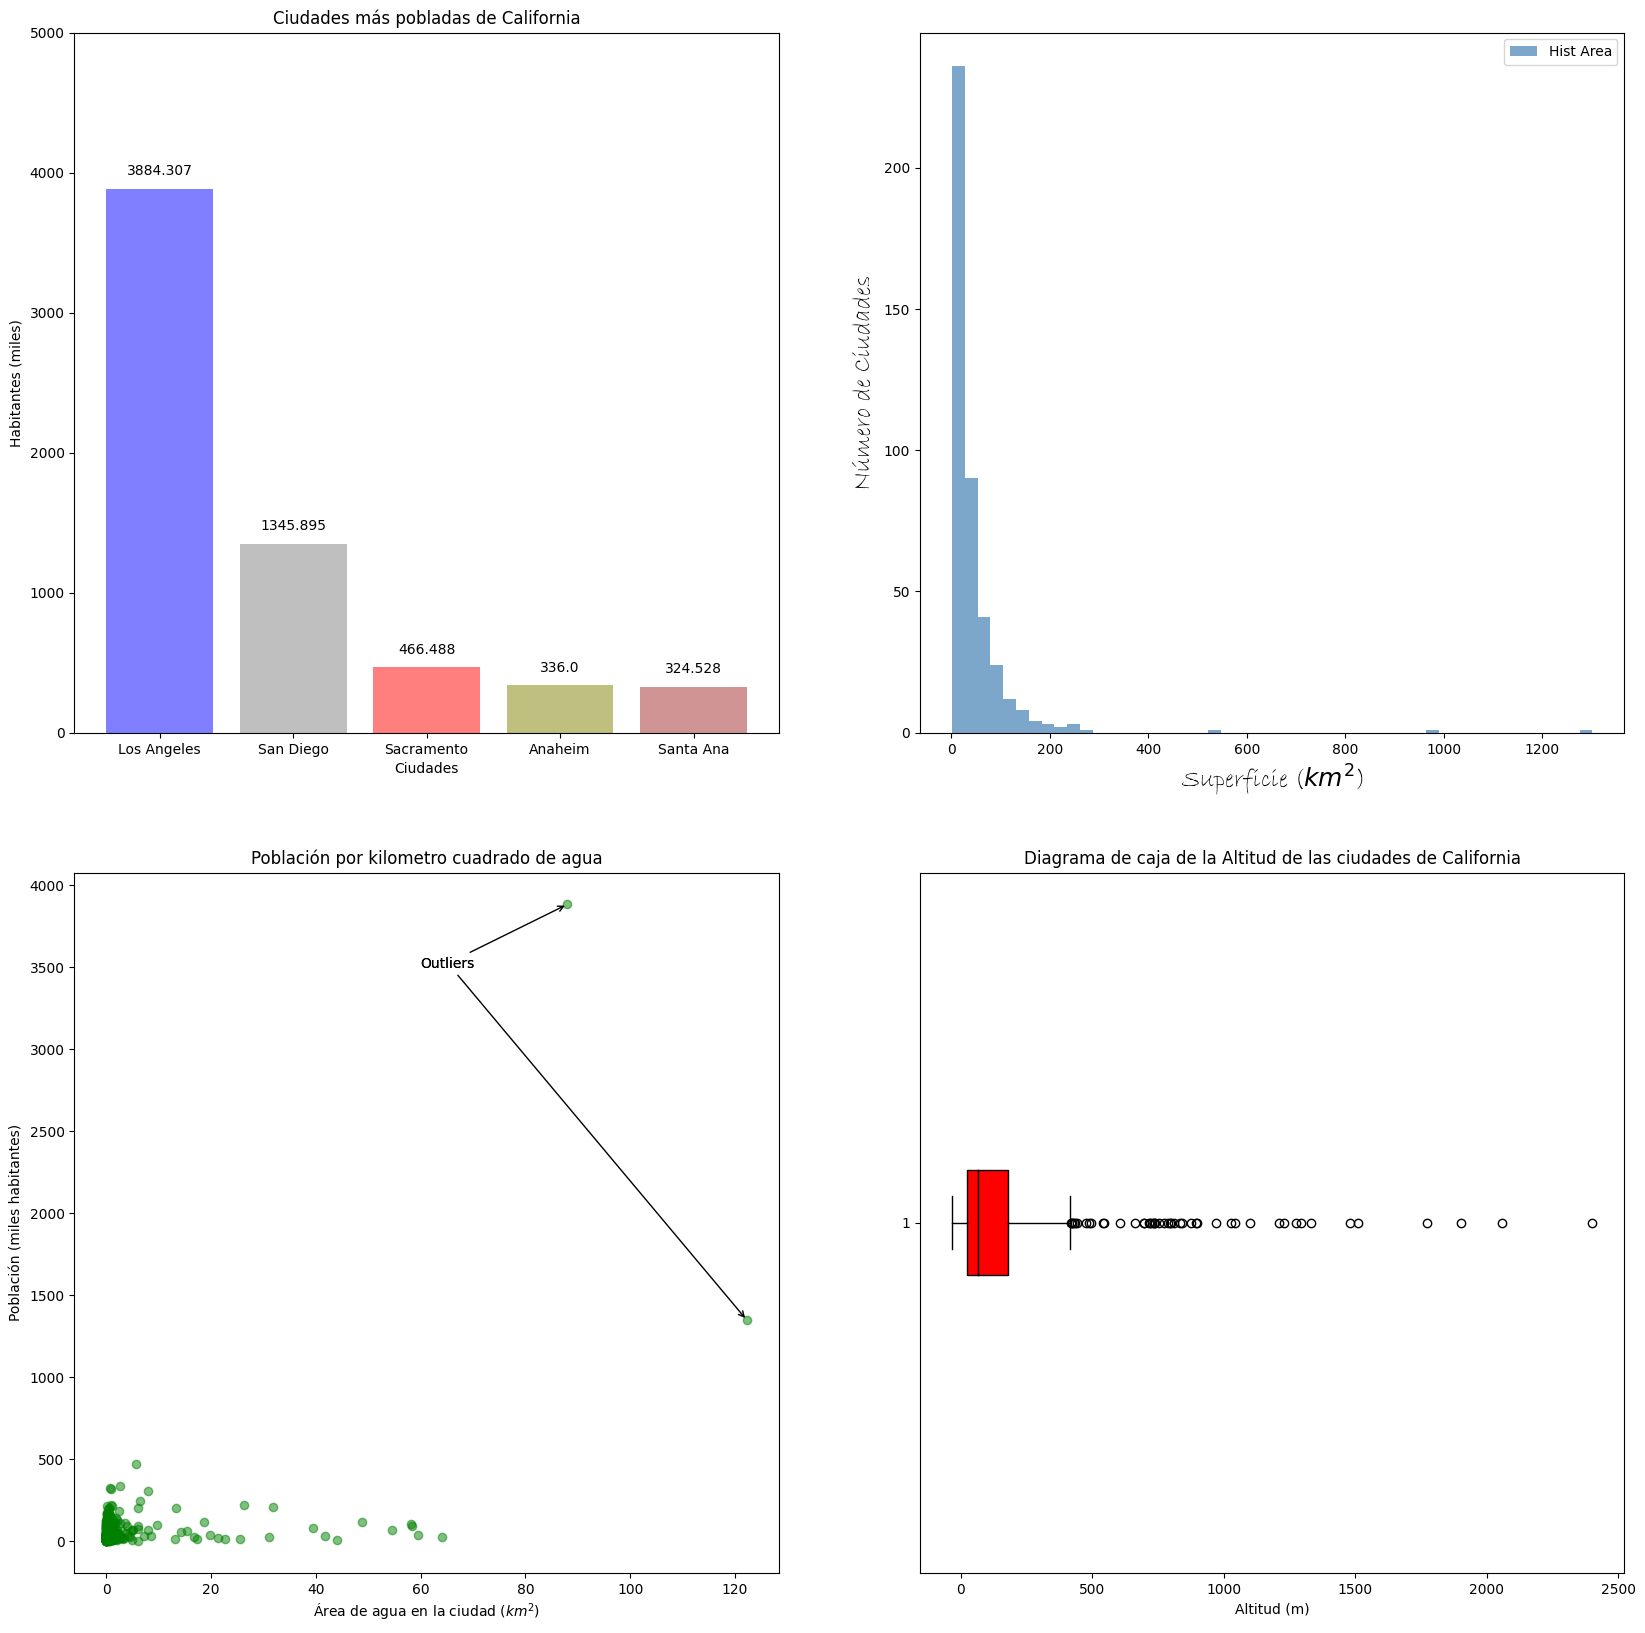

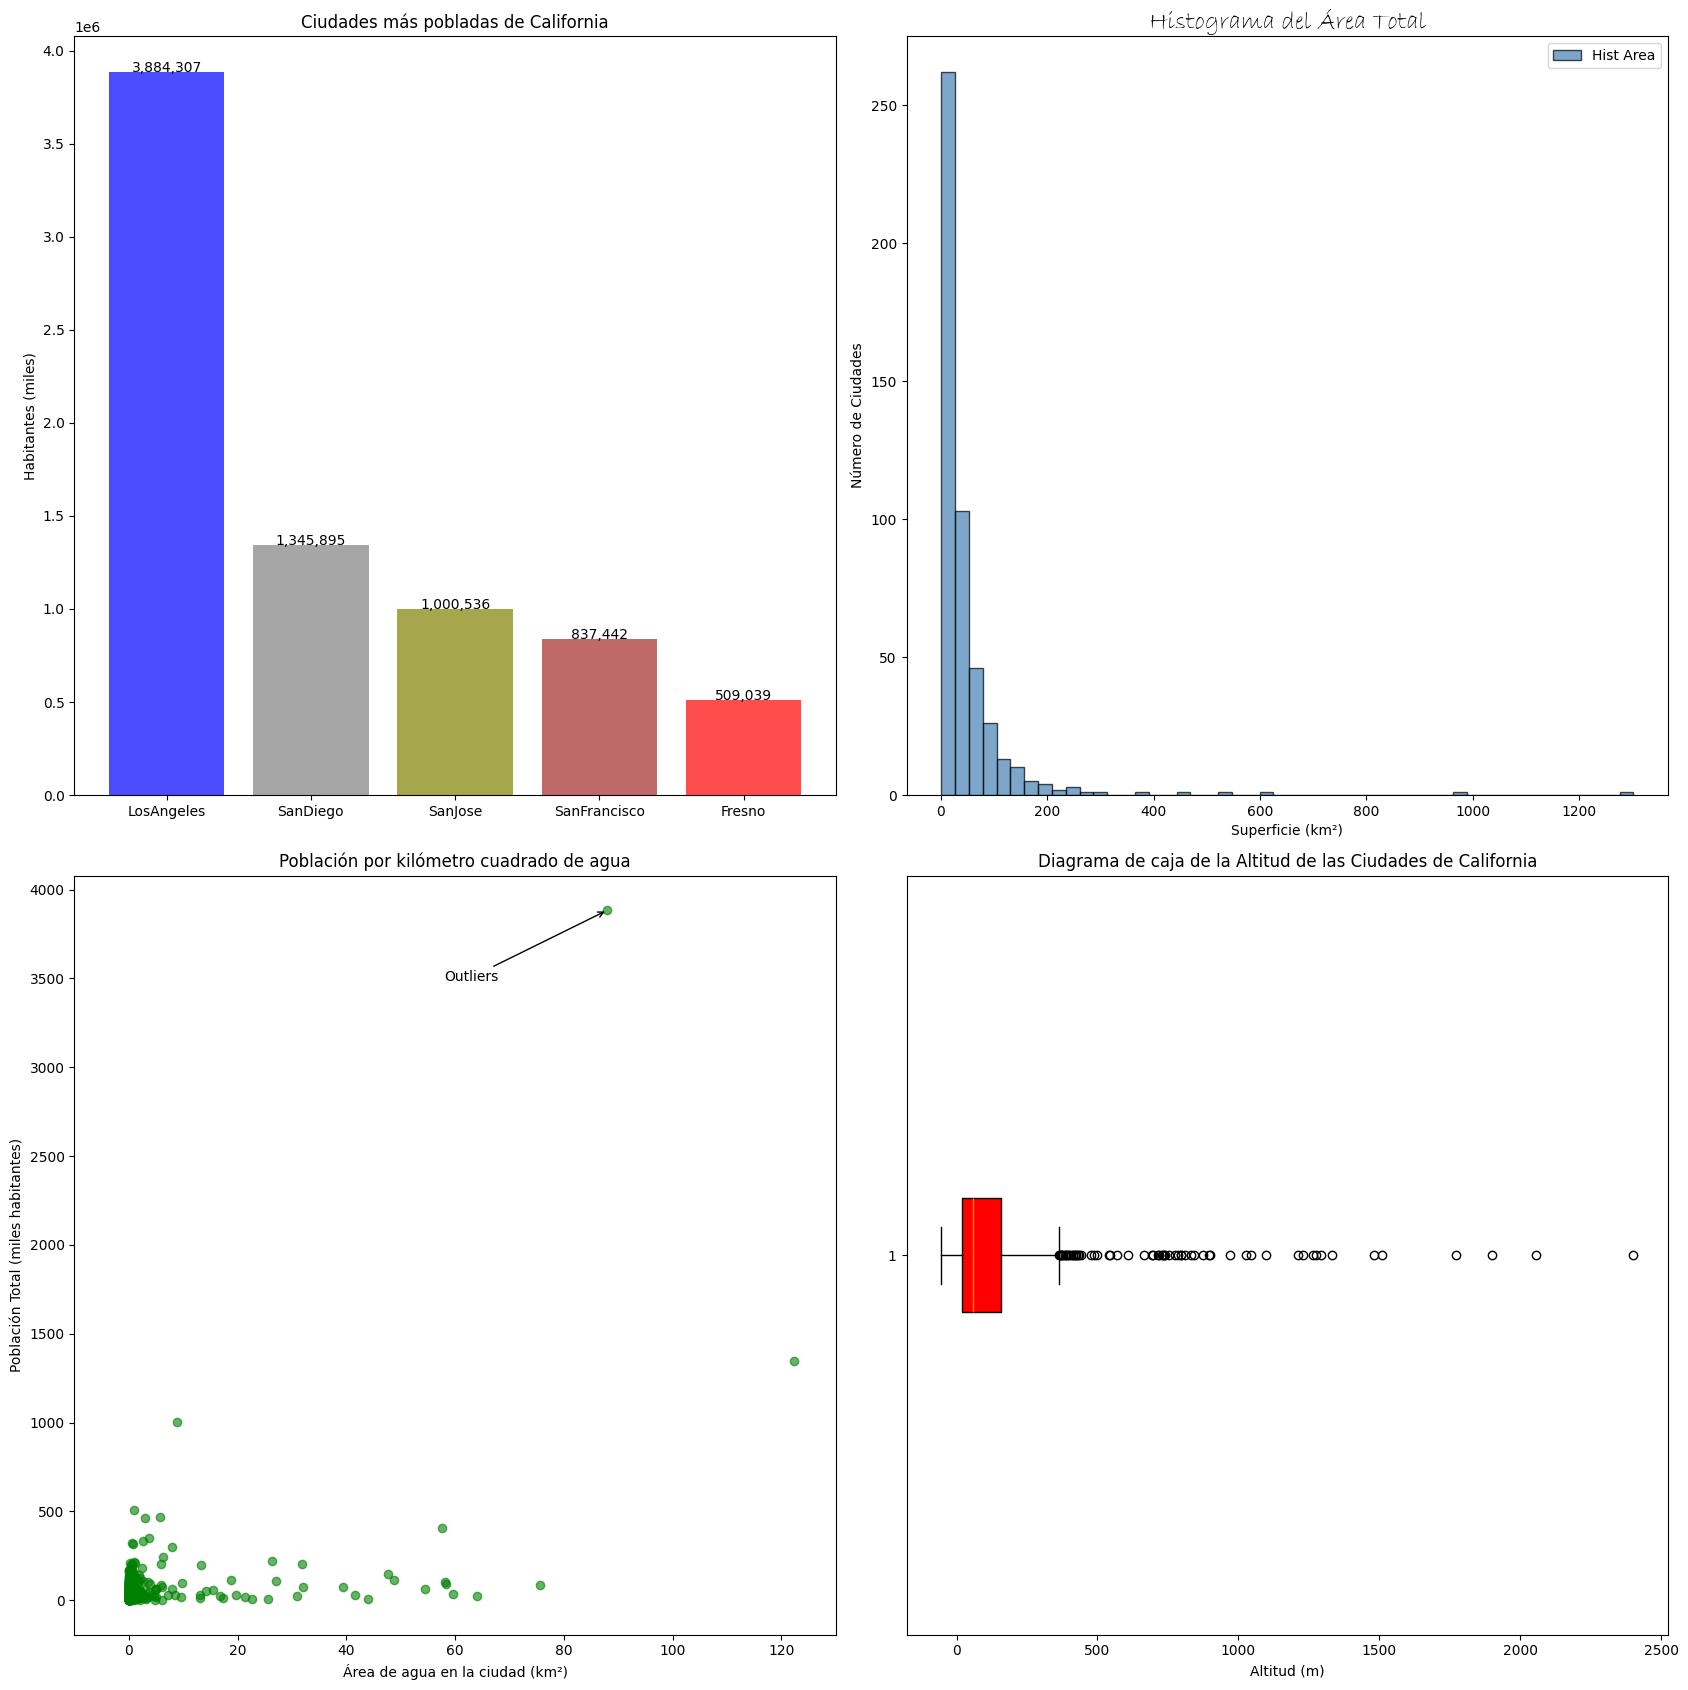

In [ ]:
# Crear la figura principal para combinar los gráficos
fig, axs = plt.subplots(2, 2, figsize=(17, 17))

# Gráfico 1: Ciudades más pobladas
top_cities = df.nlargest(5, 'population_total')
colors = ['blue', 'grey', 'olive', 'brown', 'red']
axs[0, 0].bar(top_cities['city'], top_cities['population_total'], color=colors, alpha=0.7)
axs[0, 0].set_title("Ciudades más pobladas de California")
axs[0, 0].set_ylabel("Habitantes (miles)")
for i, v in enumerate(top_cities['population_total']):
    axs[0, 0].text(i, v + 100, f"{v:,}", ha='center', fontsize=10)

# Gráfico 2: Histograma del área total ocupada por las ciudades
axs[0, 1].hist(df['area_total_km2'], bins=50, color='steelblue', edgecolor='black', alpha=0.7, label="Hist Area")
axs[0, 1].set_title("Histograma del Área Total", fontsize=18, fontname="Bradley Hand ITC")
axs[0, 1].set_xlabel("Superficie (km²)")
axs[0, 1].set_ylabel("Número de Ciudades")
axs[0, 1].legend()

# Gráfico 3: Dispersión del área de agua vs población con flechas y límite en x
axs[1, 0].scatter(df['area_water_km2'], df['population_total'] / 1000, alpha=0.6, color='green')
axs[1, 0].set_title("Población por kilómetro cuadrado de agua")
axs[1, 0].set_xlabel("Área de agua en la ciudad (km²)")
axs[1, 0].set_ylabel("Población Total (miles habitantes)")
axs[1, 0].set_xlim(-10, 130)

# Identificar y marcar los máximos en vertical y horizontal como outliers
max_horizontal = df.loc[df['area_water_km2'].idxmax()]  # Máximo en área de agua
max_vertical = df.loc[df['population_total'].idxmax()]  # Máximo en población

# Dibujar flechas para el máximo vertical (población) y horizontal (area de agua)
axs[1, 0].annotate('Outliers',
                   xy=(max_vertical['area_water_km2'], max_vertical['population_total'] / 1000),
                   xytext=(max_vertical['area_water_km2'] - 30, (max_vertical['population_total'] / 1000) - 400),
                   arrowprops=dict(facecolor='black', arrowstyle='->'),
                   fontsize=10, color='black')

# Flecha hacia el máximo horizontal (área de agua)
axs[1, 0].annotate('',
                   xy=(max_horizontal['area_water_km2'], max_horizontal['population_total'] / 1000),
                   xytext=(max_vertical['area_water_km2'] - 30, (max_vertical['population_total'] / 1000) - 400),  # Mismo punto de origen
                   arrowprops=dict(facecolor='black', arrowstyle='->'),
                   fontsize=10, color='black')

# Gráfico 4: Boxplot de la altura de las ciudades
axs[1, 1].boxplot(df['elevation_m'], patch_artist=True, vert=False, boxprops=dict(facecolor='red', color='black'))
axs[1, 1].set_title("Diagrama de caja de la Altitud de las Ciudades de California")
axs[1, 1].set_xlabel("Altitud (m)")

# Ajustar el diseño y mostrar el gráfico combinado
plt.tight_layout()
plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [59]:
fig.savefig('Image_replicated.png')